# Metric methods

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
import sklearn as skl
import pandas as pd
import numpy as np
from sklearn import neighbors as nb
import numpy as np
from  utility import plot_predictions_2D
from sklearn.model_selection import train_test_split
random_state=0

In [11]:
np.set_printoptions(linewidth=140,edgeitems=10)
rcParams['figure.figsize'] = (8.0, 5.0)

###  How does KNN work on toy oval noisy classes ?

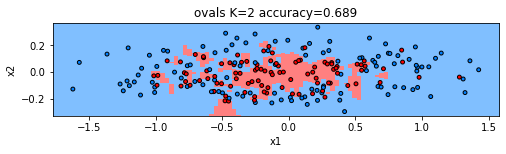

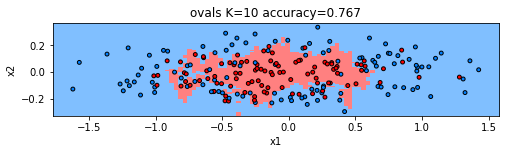

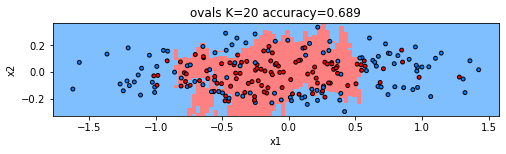

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
random_state=0
num_samples = 300
X, y = datasets.make_circles(n_samples=num_samples, factor=.5, noise=.3,random_state=random_state)

X[:,1]=X[:,1]/5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

for n in [2,10,20]:
    knn_model=nb.KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train,y_train)
    Y_predicted = knn_model.predict(X_test)
    accuracy = accuracy_score(Y_predicted,y_test)
    
    plot_predictions_2D(
        knn_model, X_train, y_train, task='classification', n=100, cmap=cm.ocean, feature_names=['x1','x2'],alpha=0.5)
    title('ovals K=%d accuracy=%.3f'%(n,accuracy))   



### Featues scaling




- **StandardScaler()**
- **MinMaxScaler()**

and other classes from sklearn.preprocessing



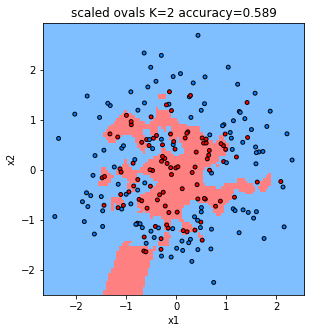

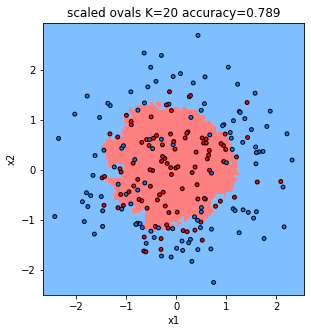

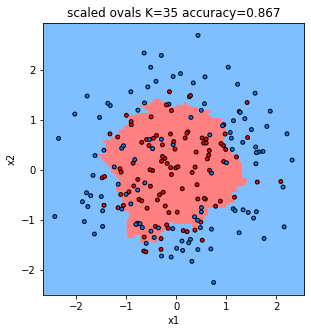

In [15]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

X_train_norm = scaler.fit_transform(X_train)
X_test_norm=scaler.transform(X_test)
for n in [2,20,35]:
    knn_model=nb.KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train_norm,y_train)
    Y_predicted = knn_model.predict(X_test_norm)
    accuracy = accuracy_score(Y_predicted,y_test)
    plot_predictions_2D(
        knn_model, X_train_norm, y_train, task='classification', n=100, cmap=cm.ocean, feature_names=['x1','x2'],alpha=0.5)
    title('scaled ovals K=%d accuracy=%.3f'%(n,accuracy))

#### Feature scaling improved accuracy from  0.767 to 0.867


## Parameteres search

0| 1| 2| 3| 4| 5| 6| 7| 8| 9| 10| 11| 12| 13| 14| 15| 16| 17| 18| 19| 20| 21| 22| 23| 24| 25| 26| 27| 28| 29| 30| 31| 32| 33| 34| 35| 36| 37| 38| 39| 40| 41| 42| 43| 44| 45| 46| 47| 48| 49| 51| 52| 53| 54| 55| 56| 57| 58| 59| 60| 61| 62| 63| 64| 65| 66| 67| 68| 69| 70| 71| 72| 73| 74| 75| 76| 77| 78| 79| 80| 81| 82| 83| 84| 85| 86| 87| 88| 89| 90| 91| 92| 93| 94| 95| 96| 97| 98| 99| 100.0| 
Min error_rate = 0.1333 for n_neighbors=44


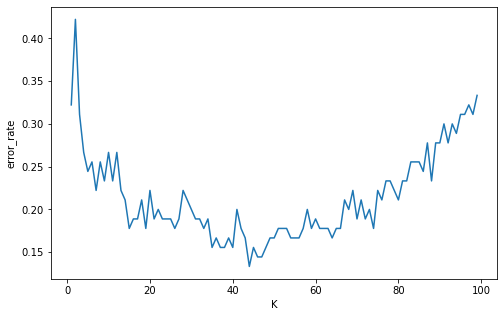

In [16]:
from utility import show_param_dependency
knn = KNeighborsClassifier(p=3)
show_param_dependency(knn, X_train_norm, y_train, X_test_norm, y_test, param_name='n_neighbors', 
     
                      loss_fun='error_rate', param_vals=arange(1,100,1), x_label='K')

##  GridSearchCV
<img src="images/grid_search_cross_validation.png" width="600" height="600" />

    sklearn.model_selection.**GridSearchCV**(estimator, param_grid,...)



## Dataset

https://en.wikipedia.org/wiki/Iris_flower_data_set

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

<center>
<img src="./images/iris_flowers.png" width=800)/>
        <br/>
</center>

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=random_state)

knn = nb.KNeighborsClassifier()
param_grid = {'n_neighbors':[1,3,5,8,10,15,20], 'p':[1,2,4,6]}
grid_knn = GridSearchCV(knn, param_grid, n_jobs=-1, refit=True)
grid_knn.fit(x_train,y_train)
print(grid_knn.best_score_, grid_knn.best_params_)

y_predicted = grid_knn.predict(x_test)
accuracy = accuracy_score(y_test,y_predicted)
print("accuracy=%.3f" %accuracy)

0.97 {'n_neighbors': 5, 'p': 4}
accuracy=0.980


## Pipeline
 [`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html):

 sklearn.pipeline.**Pipeline**(steps, *, memory=None, verbose=False)




 sklearn.pipeline.**make_pipeline**(*steps, memory=None, verbose=False)




In [18]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state=0)


pipeline = Pipeline(steps = [
              ('scaler', StandardScaler())
 
              ,('KNN',KNeighborsClassifier())
           ])
 # define the pipeline object.
parameteres = {'KNN__n_neighbors':[1,2,5,10], 'KNN__p':[1,2,5]}


grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)
grid.fit(x_train, y_train)

print(grid.score(x_test,y_test))
print(grid.best_params_)


0.94
{'KNN__n_neighbors': 1, 'KNN__p': 5}
